In [1]:
!wget https://shorturl.at/BLXZ5 -O spam.csv

--2024-02-23 17:20:21--  https://shorturl.at/BLXZ5
Resolving shorturl.at (shorturl.at)... 172.67.69.88, 104.26.8.129, 104.26.9.129, ...
Connecting to shorturl.at (shorturl.at)|172.67.69.88|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.shorturl.at/BLXZ5 [following]
--2024-02-23 17:20:21--  https://www.shorturl.at/BLXZ5
Resolving www.shorturl.at (www.shorturl.at)... 104.26.9.129, 172.67.69.88, 104.26.8.129, ...
Connecting to www.shorturl.at (www.shorturl.at)|104.26.9.129|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/codebasics/py/master/ML/14_naive_bayes/spam.csv [following]
--2024-02-23 17:20:21--  https://raw.githubusercontent.com/codebasics/py/master/ML/14_naive_bayes/spam.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)

In [2]:
import pandas as pd
df = pd.read_csv("/content/spam.csv")
df.head()

Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...

In [3]:
df.Category.unique()

array(['ham', 'spam'], dtype=object)

In [4]:
X = df.Message
y = df.Category

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [6]:
model = Pipeline([("vectorizer", CountVectorizer()), ('algorithm', MultinomialNB())])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

In [8]:
model.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('algorithm', MultinomialNB())])

In [9]:
y_pred = model.predict(X_test)

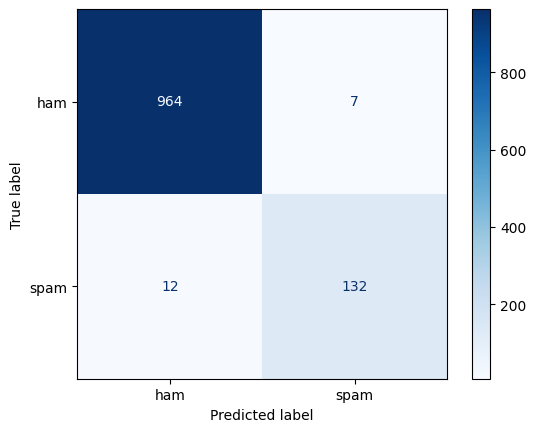

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')

In [11]:
model.predict(['you won a lottery woth 500 USD. click the link to claim your prize.'])

array(['spam'], dtype='<U4')

#Saving Model for Inference

In [12]:
import pickle

In [13]:
with open("email_classifier.pickle", 'wb') as file:
  pickle.dump(model, file)